# Chapter 14: Comprehensive Examples
## 14.1.3 Polynomial Class

In [1]:
from matplotlib.pyplot import *
%matplotlib notebook
from scipy import *
import scipy.linalg as sl

In [12]:
class PolyNomial:
    base='monomial'
    def __init__(self,**args):
        if 'points' in args:
            self.points = array(args['points'])
            self.xi = self.points[:,0]
            self.coeff = self.point_2_coeff()
            self.degree = len(self.coeff)-1
        elif 'coeff' in args:
            self.coeff = array(args['coeff'])
            self.degree = len(self.coeff)-1
            self.points = self.coeff_2_point()
        else:
            self.points = array([[0,0]])
            self.xi = array([1.])
            self.coeff = self.point_2_coeff()
            self.degree = 0
    def point_2_coeff(self):
        return sl.solve(vander(self.x),self.y)
    def coeff_2_point(self):
        points=[[x,self(x)] for x in linspace(0,1,self.degree+1)]
        return array(points)
    def __call__(self,x):
        return polyval(self.coeff,x)
    @property
    def x(self):
        return self.points[:,0]
    @property
    def y(self):
        return self.points[:,1]
    def __repr__(self):
        txt='Polynomial of degree {degree} \n' 
        txt+='with coefficients {coeff} \n in {base} basis.'
        return txt.format(coeff=self.coeff, degree=self.degree,
                                            base=self.base)
    margin = .05
    plotres = 500
    def plot(self,ab=None,plotinterp=True):
        if ab is None: # guess a and b
            x = self.x
            a,b = x.min(),x.max()
            h = b-a
            a -= self.margin*h
            b += self.margin*h
        else:
            a,b = ab
        x = linspace(a,b,self.plotres)
        y = vectorize(self.__call__)(x)
        plot(x,y)
        xlabel('$x$', fontsize='large')
        ylabel('$p(x)$', fontsize='large')
        if plotinterp: plot(self.x, self.y, 'ro')
    def companion(self):
        companion = eye(self.degree, k=-1)
        companion[0,:] -= self.coeff[1:]/self.coeff[0]
        return companion
    def zeros(self):
        companion = self.companion()
        return sl.eigvals(companion)
    

#### Example

Polynomial of degree 2 
with coefficients [  1.00000000e+00   8.88178420e-16  -1.00000000e+00] 
 in monomial basis.
The polynomial coefficients are  [  1.00000000e+00   8.88178420e-16  -1.00000000e+00]
The zeros are [-1.+0.j  1.+0.j] and the polynomial evaluates to [ -2.22044605e-16+0.j   2.22044605e-16+0.j]


<IPython.core.display.Javascript object>


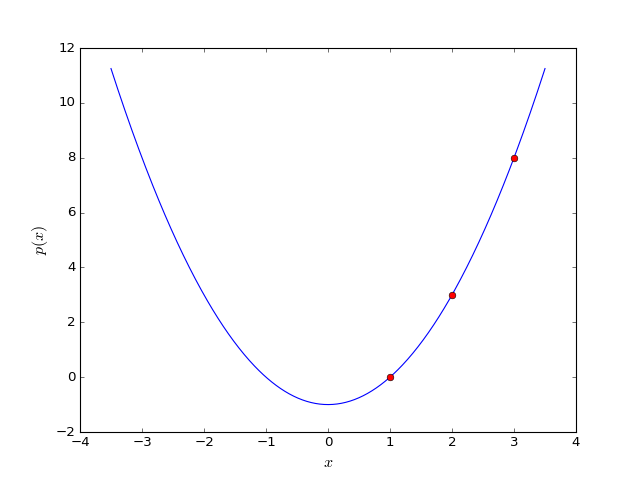

In [15]:
import scipy.linalg as sl
p = PolyNomial(points=[(1,0),(2,3),(3,8)])
pz = p.zeros()
print(p)
print('The polynomial coefficients are ',p.coeff)
print('The zeros are {} and the polynomial evaluates to {}'.format(pz, p(pz)))
clf() # clear the figure for a new plot
p.plot((-3.5,3.5))


## Newton Polynomials

Let us briefly check how this works.

Polynomial of sdegree 3 
 with coefficients [ 0.          2.         -4.          2.66666667] 
 in Newton basis.


<IPython.core.display.Javascript object>


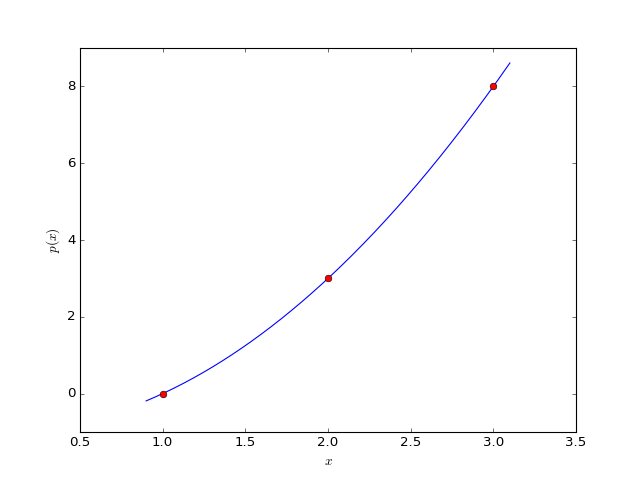

In [17]:
pts = array([[0.,0],[.5,1],[1.,0],[2,0.]]) 
pN = NewtonPolynomial(points=pts) 
print(pN)
figure()
pN.plot()
savefig('polyplot.pdf',bbox_inches='tight',transparent=True)
savefig('polyplot.png',bbox_inches='tight',transparent=True)

## 14.2 Spectral Clustering
#### Ex. 14.2

In [6]:
import scipy.linalg as sl

# create some data points
n = 100
x1 = 1.2 * random.randn(n, 2)
x2 = 0.8 * random.randn(n, 2) + tile([7, 0],(n, 1))
x = vstack((x1, x2))

# pairwise distance matrix
M = array([[ sqrt(sum((x[i] - x[j])**2)) for i in range(2 * n) ] for j in range(2 * n)])

# create the Laplacian matrix
D = diag(1 / sqrt( M.sum(axis = 0) ))
L = identity(2 * n) - dot(D, dot(M, D))

# compute eigenvectors of L
S, V = sl.eig(L)
S=S.real
V=V.real

The eigenvector corresponding to the largest eigenvalue gives the grouping (for example by thresholding at 0) and can be shown with

<IPython.core.display.Javascript object>


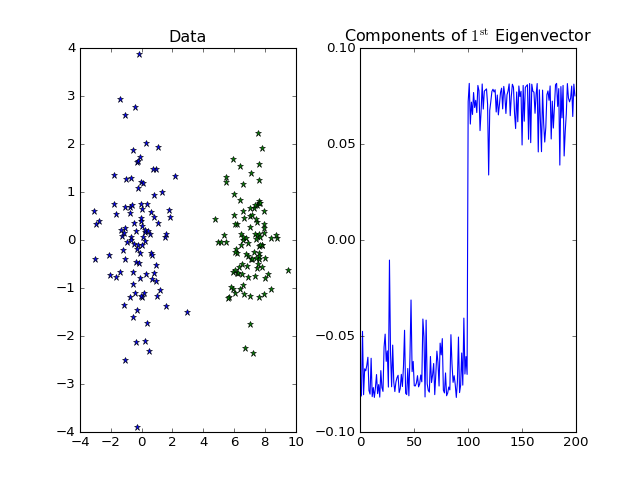

In [7]:
largest=abs(S).argmax()
figure()
subplot(1,2,1) 
plot(x1[:,0],x1[:,1],'*')
plot(x2[:,0],x2[:,1],'*')
title('Data')
subplot(1,2,2)
title('Components of $1^{\mathrm{st}}$ Eigenvector')
plot(V[:,largest])
subplots_adjust(wspace=0.3)
savefig('cluster1.pdf',bbox_inches='tight',transparent=True)
savefig('cluster1.png',bbox_inches='tight',transparent=True)

#### Ex. 14.3

In [8]:
import scipy.linalg as sl
import scipy.cluster.vq as sc
# simple 4 class data
x = random.rand(1000,2)
ndx = ((x[:,0] < 0.4) | (x[:,0] > 0.6)) & ((x[:,1] < 0.4) | (x[:,1] > 0.6))
x = x[ndx]
n = x.shape[0]

# pairwise distance matrix
M = array([[ sqrt(sum((x[i]-x[j])**2)) for i in range(n) ] for j in range(n)])

# create the Laplacian matrix
D = diag(1 / sqrt( M.sum(axis=0) ))
L = identity(n) - dot(D, dot(M, D))

# compute eigenvectors of L
_,S,V = sl.svd(L)

k = 4
# take k first eigenvectors
eigv = V[:k,:].T

# k-means
centroids,dist = sc.kmeans(eigv,k)
clust_id = sc.vq(eigv,centroids)[0]

The result can be plotted using

<IPython.core.display.Javascript object>


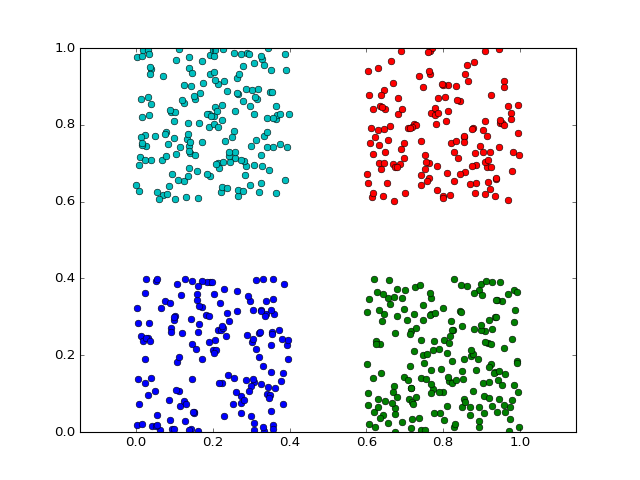

In [9]:
figure()
for i in range(k):
    ndx = where(clust_id == i)[0]
    plot(x[ndx, 0], x[ndx, 1],'o')
axis('equal')
savefig('spectral_4class.pdf',bbox_inches='tight',transparent=True)
savefig('spectral_4class.png',bbox_inches='tight',transparent=True)

## 14.3 Solving Initial Value Problems

In [10]:
class IV_Problem:
    """
    Initial value problem (IVP) class
    """
    def __init__(self, rhs, y0, interval, name='IVP'):
        """
        rhs 'right hand side' function of the ordinary differential equation f(t,y)
        y0  array with initial values
        interval start and end value of the interval of independent variables
                often initial and end time
        name descriptive name of the problem
        """
        self.rhs = rhs
        self.y0 = y0
        self.t0, self.tend = interval
        self.name = name        

#### Ex. 14.4
We consider the pendulum problem

In [11]:
def rhs(t,y):
    g = 9.81
    l = 1.
    yprime=array([y[1], g / l * sin(y[0])])
    return yprime

pendulum=IV_Problem(rhs, array([pi / 2, 0.]), [0., 10.] , 'mathem. pendulum') 

Now we build solvers and add methods

In [12]:
class IVPsolver:
    """
    IVP solver class for explicit one-step discretization methods
    with constant step size
    """
    def __init__(self, problem, discretization, stepsize):
        self.problem = problem
        self.discretization = discretization
        self.stepsize = stepsize
    def one_stepper(self):
        yield self.problem.t0, self.problem.y0
        ys = self.problem.y0
        ts = self.problem.t0
        while ts <= self.problem.tend:
            ts, ys = self.discretization(self.problem.rhs, ts, ys, self.stepsize)
            yield ts, ys
    def solve(self):
        return list(self.one_stepper())

Now we define discretizations

In [13]:
def expliciteuler(rhs, ts, ys, h):
    return ts + h, ys + h * rhs(ts, ys)
def rungekutta4(rhs, ts, ys, h):
    k1 = h * rhs(ts, ys)
    k2 = h * rhs(ts + h/2., ys + 1/2. * k1) 
    k3 = h * rhs(ts + h/2., ys + 1/2. * k2)
    k4 = h * rhs(ts + h, ys +  k3)
    return ts + h, ys + 1./6*(k1 + 2*k2 + 2*k3 + k4)

With this we can create instances to obtain the corresponding discretized versions of the pendulum ODE:

In [14]:
pendulum_Euler = IVPsolver(pendulum, expliciteuler, 0.001)
pendulum_RK4   = IVPsolver(pendulum, rungekutta4, 0.001)

and use them to solve our problem

<IPython.core.display.Javascript object>


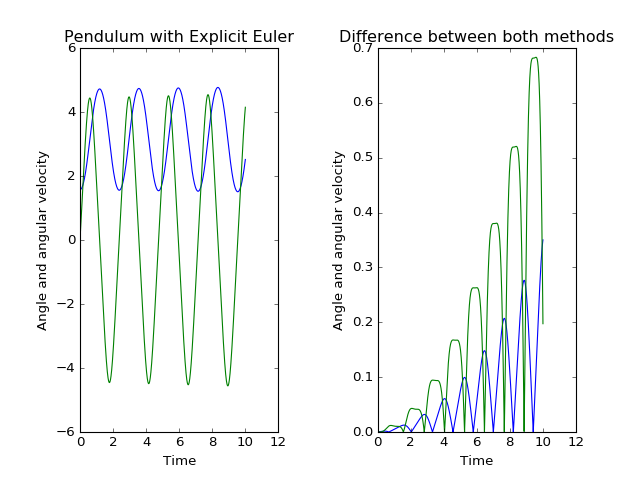

In [15]:
sol_Euler = pendulum_Euler.solve()
sol_RK4 = pendulum_RK4.solve()
tEuler, yEuler = zip(*sol_Euler)
tRK4, yRK4 = zip(*sol_RK4)
figure()
subplot(1,2,1), plot(tEuler,yEuler),\
       title('Pendulum with Explicit Euler'),\
       xlabel('Time'), ylabel('Angle and angular velocity')
subplot(1,2,2), plot(tRK4,abs(array(yRK4)-array(yEuler))),\
       title('Difference between both methods'),\
       xlabel('Time'), ylabel('Angle and angular velocity')
subplots_adjust(wspace=0.5)
savefig('ivp_example.pdf',bbox_inches='tight',transparent=True)
savefig('ivp_example.png',bbox_inches='tight',transparent=True)